In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Normalization and standardization are crucial steps in data preprocessing for machine learning and statistical analysis. The choice of method depends on the nature of the data and the specific requirements of the analysis or model. Here are the four methods discussed previously, along with guidelines on when to use each and the reasons for their use.

1. Min-Max Normalization
When to Use:
When you need to scale data to a fixed range, typically [0, 1].
When features have different scales, and you want them to contribute equally to the model.
Suitable for algorithms that do not assume any distribution of the data, such as K-Nearest Neighbors (KNN) and Neural Networks.
Why to Do It:
To ensure that all features are on the same scale, which helps in improving the performance and training stability of the model.
To handle features with different units and scales.
To prepare data for visualization, where a fixed range is necessary.
Example Situation:
When building a KNN classifier, since the algorithm computes the distance between points, having features on different scales can distort the distance metric.


2. Z-Score Standardization (Standard Normalization)
When to Use:
When you need data to have a mean of 0 and a standard deviation of 1.
When the data follows or is assumed to follow a normal distribution.
Suitable for algorithms that assume data to be normally distributed, such as Linear Regression, Logistic Regression, and Principal Component Analysis (PCA).
Why to Do It:
To center the data and reduce the effects of outliers.
To improve the convergence of gradient descent in optimization algorithms.
To ensure that each feature contributes equally to the analysis.
Example Situation:
When applying PCA, as it assumes that the data is centered around zero and uses variance to determine principal components.


3. Max Abs Scaling
When to Use:
When you need to scale data to the range [-1, 1], especially for sparse data (data with a lot of zeros).
Suitable for algorithms that are sensitive to the magnitude of features but not their sign, such as some variants of SVM and regression models.
Why to Do It:
To preserve the sparsity of the data, which is important for efficiency in computation.
To scale features while maintaining the relative distances between data points.
Example Situation:
When working with text data represented as TF-IDF or word counts, where the dataset is sparse and contains many zero values.



4. Robust Scaling
When to Use:
When the dataset contains outliers that can skew the results of other scaling methods.
Suitable for datasets with many outliers or non-normal distributions.
Why to Do It:
To reduce the influence of outliers by using statistics that are less sensitive to them (median and IQR).
To improve the performance of models by ensuring that the scaled data represents the majority of the data points accurately.
Example Situation:
When preprocessing financial data, which often contains outliers due to extreme values in stock prices or financial ratios.



Summary
Choosing the right normalization or standardization method depends on:

The nature and distribution of the data.
The specific requirements of the machine learning algorithm or statistical analysis.
The presence of outliers and the scale of features.
By understanding these factors, you can select the appropriate method to preprocess your data, thereby improving the performance and reliability of your models and analyses.

In [2]:
df = pd.read_csv("wine_data.csv", header=None,usecols=[0,1,2])

In [3]:
df

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [4]:
df.columns=['class label', 'alcohol', 'malic acid']

In [5]:
df

,class label,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


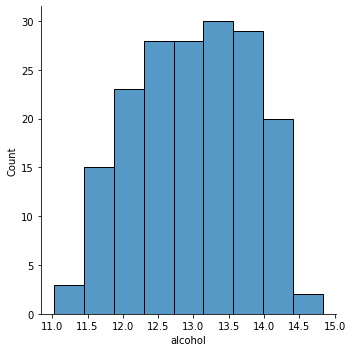

In [6]:
sns.displot(df['alcohol'])


<AxesSubplot: xlabel='alcohol', ylabel='Density'>

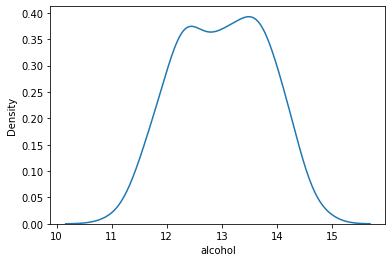

In [7]:
sns.kdeplot(df['alcohol'])

<AxesSubplot: xlabel='malic acid', ylabel='Density'>

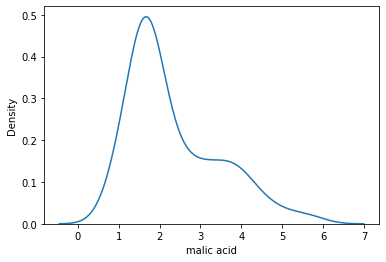

In [8]:
sns.kdeplot(df['malic acid'])

In [9]:
color_dict = {1:'red', 2:'blue',3:"green"}

<AxesSubplot: xlabel='alcohol', ylabel='malic acid'>

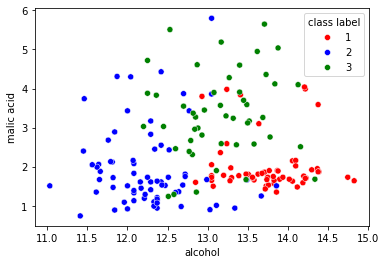

In [10]:
sns.scatterplot(x=df['alcohol'],y=df['malic acid'], hue=df['class label'],palette=color_dict)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class label', axis=1), df['class label'],test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [17]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
np.round(X_train.describe(), 1)

,alcohol,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [20]:
np.round(X_train_scaled.describe(), 1)

,alcohol,malic acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.6
max,1.0,1.0


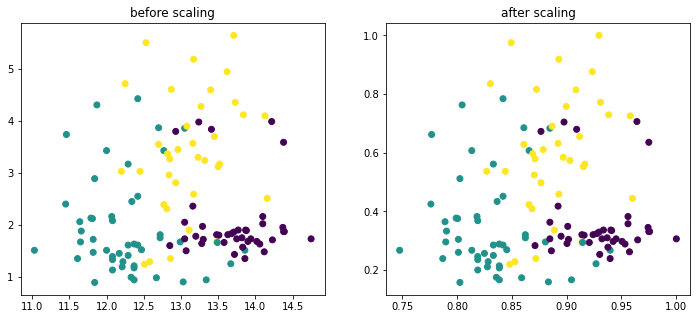

In [21]:
#before after 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['alcohol'], X_train['malic acid'], c =y_train)
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['malic acid'], c=y_train)
ax2.set_title("after scaling")
plt.show()

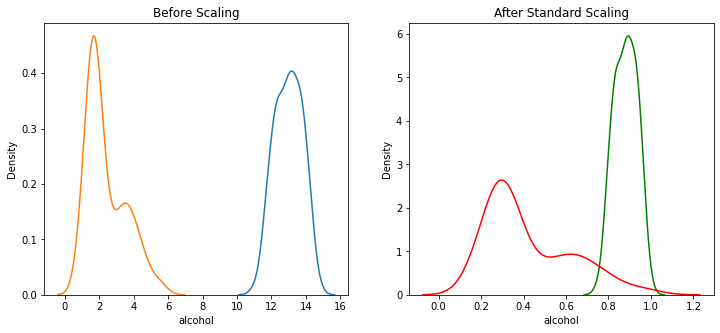

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2, color='green')
sns.kdeplot(X_train_scaled['malic acid'], ax=ax2, color= 'red')
plt.show()

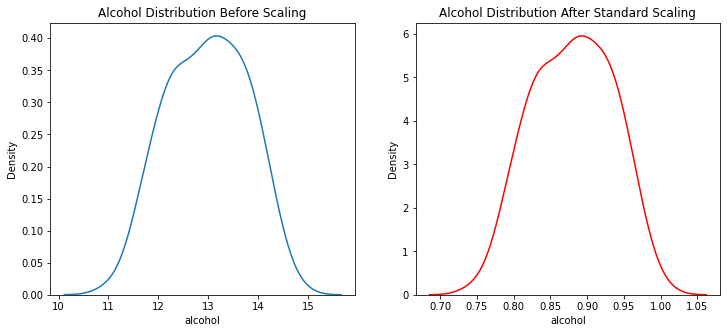

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2, color="red")
plt.show()

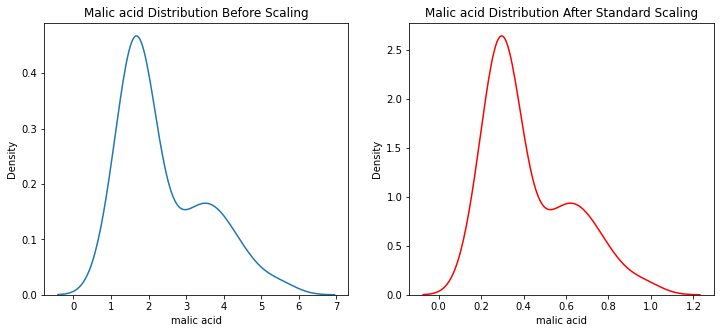

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['malic acid'], ax=ax2, color='red')
plt.show()